In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from dice_rl_TU_Vienna.value import get_get_policy_value_dataframe
from dice_rl_TU_Vienna.runners.tabular_dice_runner import TabularDiceRunner_Dataframe

from plugins.recycling_robot.config import *
from plugins.recycling_robot.load import *
from plugins.recycling_robot.plot import plot
from plugins.recycling_robot.dataframe import get_df

Try loading model data/recycling_robot/policies/total_timesteps=10000
Try loading model data/recycling_robot/policies/total_timesteps=100000


In [4]:
df_behavior = get_df(
    env=env_masked,
    get_act=get_act_behavior,
    target_policy=policy["e"],
    path=os.path.join(dataframes_dir, f"behavior.parquet"),
)

df_behavior

trying to load df from data/recycling_robot/dataframes/behavior.parquet


,id,t,obs,act,rew,probs_eval
0,0,0,0,2,0,"[0.0027404132, 0.003625292, 0.9936342]"
1,0,1,1,1,4,"[0.00023806209, 0.999762, 0.0]"
2,0,2,0,2,0,"[0.0027404132, 0.003625292, 0.9936342]"
3,0,3,1,0,0,"[0.00023806209, 0.999762, 0.0]"
4,0,4,1,1,8,"[0.00023806209, 0.999762, 0.0]"
...,...,...,...,...,...,...
99995,99,995,0,1,2,"[0.0027404132, 0.003625292, 0.9936342]"
99996,99,996,0,2,0,"[0.0027404132, 0.003625292, 0.9936342]"
99997,99,997,1,1,2,"[0.00023806209, 0.999762, 0.0]"
99998,99,998,0,1,0,"[0.0027404132, 0.003625292, 0.9936342]"


In [5]:
df_evaluation = get_df(
    env=env_masked,
    get_act=get_act_evaluation,
    target_policy=policy["e"],
    path=os.path.join(dataframes_dir, f"evaluation.parquet"),
)

df_evaluation

trying to load df from data/recycling_robot/dataframes/evaluation.parquet


,id,t,obs,act,rew,probs_eval
0,0,0,0,2,0,"[0.0027404132, 0.003625292, 0.9936342]"
1,0,1,1,1,6,"[0.00023806209, 0.999762, 0.0]"
2,0,2,0,2,0,"[0.0027404132, 0.003625292, 0.9936342]"
3,0,3,1,1,4,"[0.00023806209, 0.999762, 0.0]"
4,0,4,0,2,0,"[0.0027404132, 0.003625292, 0.9936342]"
...,...,...,...,...,...,...
99995,99,995,1,1,3,"[0.00023806209, 0.999762, 0.0]"
99996,99,996,0,2,0,"[0.0027404132, 0.003625292, 0.9936342]"
99997,99,997,1,1,3,"[0.00023806209, 0.999762, 0.0]"
99998,99,998,1,1,1,"[0.00023806209, 0.999762, 0.0]"


In [ ]:
# prepare DICE

def get_split(df):
    id = df["id"]
    obs = df["obs"]
    act = df["act"]
    rew = df["rew"]
    probs_eval = df["probs_eval"]

    return id, obs, act, rew, probs_eval

def get_episode(df, id):
    f = df["id"] == id
    return df[f]

bounds = 0, env.observation_space.n, 0, env.action_space.n

runner = TabularDiceRunner_Dataframe(
    df_behavior, bounds, get_split, get_episode, base_dir, )

runner.set_dataset(n_pads=0)
runner.set_aux_estimates()
runner.set_estimator("TabularDice")

def get_policy_value_DICE(gamma):
    pv_DICE, *_ = runner.predict(gamma, projected=True, weighted=True, modified=False, lam=1e-6)
    return pv_DICE

data/recycling_robot/datasets/n_pads=0/dataset-ctr.pkl


In [6]:
# prepare OnPE

get_policy_value_OnPE_behavior, _   = get_get_policy_value_dataframe(df_behavior,   get_split, get_episode)
get_policy_value_OnPE_evaluation, _ = get_get_policy_value_dataframe(df_evaluation, get_split, get_episode)

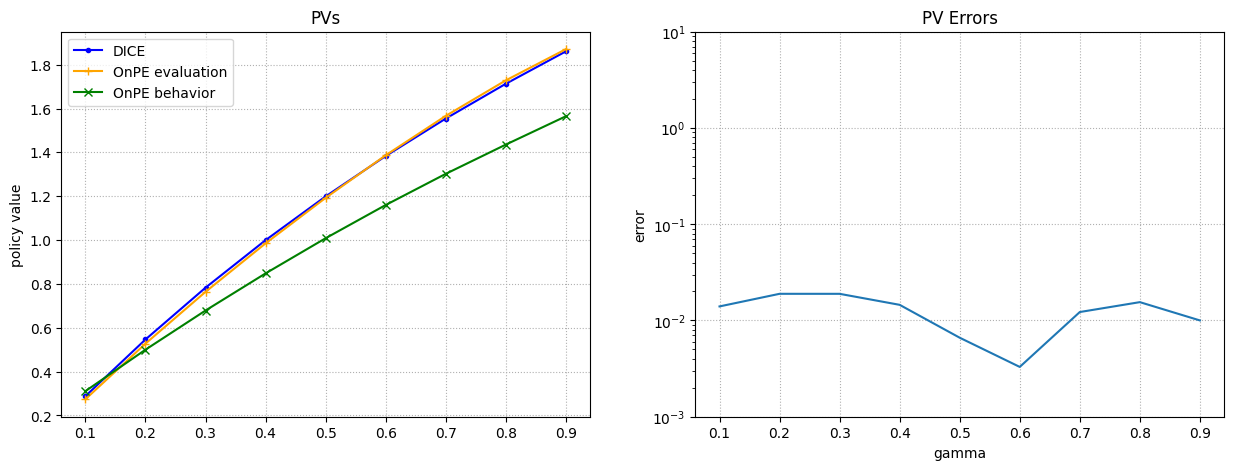

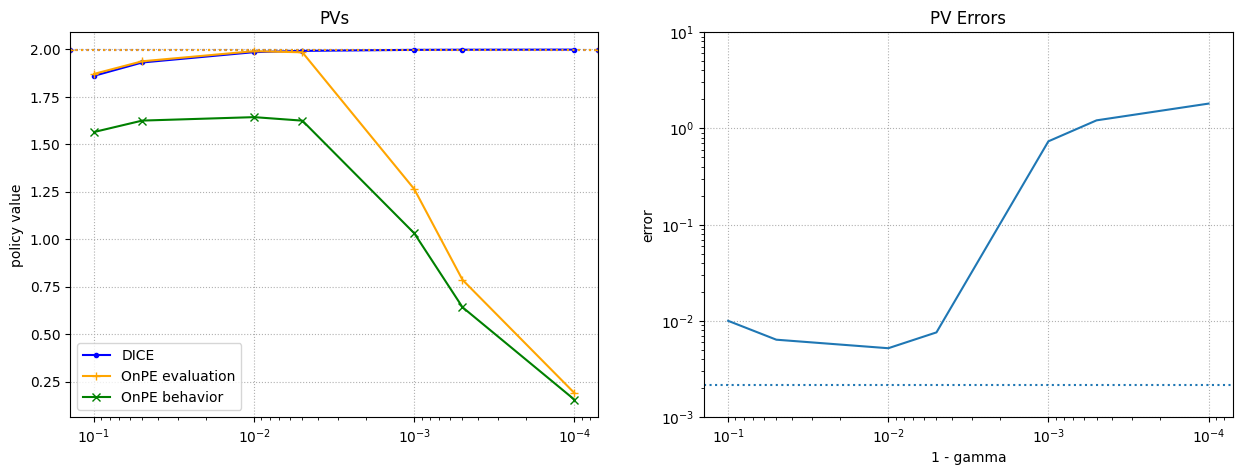

In [ ]:
get_policy_value = (
    get_policy_value_DICE,
    get_policy_value_OnPE_evaluation,
    get_policy_value_OnPE_behavior,
)

gammas = np.arange(0.1, 1.0, 0.1)
plot(gammas, *get_policy_value)

gammas = np.array([0.9, 0.95, 0.99, 0.995, 0.999, 0.9995, 0.9999])
plot(gammas, *get_policy_value, one_minus_gamma=True, include_undiscounted=True)